# 안녕하세요 투빅스 보충 과제입니다 :)

안녕하세요 투빅스 12기 김태한입니다 :)

이번 과제는 코로나 바이러스로 예상치 못한 휴식시간이 생겨 여러분의 딥러닝 감을 유지하고자 드리게 되었습니다.  

투빅이분들이라면 분명 쉽게 해낼거라 믿습니다!!


모르시는 거 있으시면 저 그리고 12기 멘토분들을 많이 많이 괴롭혀주세요!!!

# Assignment 1

여러분들은 저번 과제로 뉴럴넷 구현을 이미 한번 하셨습니다!  

사실 이번 과제의 최종 목적도 뉴럴넷 구현인데요 이미 한번 하셨고 실력들이 워낙 출중하셔서 금방금방 하실수 있으실거에요.  

구현에 바로 들어가기에 앞서 전체 네트워크 구조와 각 구성요소의 행렬 차원 및 오차역전파(back propagation) 복습이 1번 과제입니다.  

**?** 에 들어갈 수식을 채워주시면 됩니다!!  

## Matrix Shape 정리

n : sample_data 수  
d : input_dimension  
h : hidden_layer_dimension  
c : output_dimension  

- X : input_data  
- W1 : layer1_weight  
- b1 : layer1_bias  
- H : X*W1+b1
- A : activation function 거친 value 
- W2 : layer2_weight  
- b2 : layer2_bias  
- S : A*W2+b2  
- P : softmax 거친 value  
   
**X==(n,d)  
W1==(d,h)  
b1==(1,h)  
H==(n,h)   
A==(n,h)  
W2==(h,c)  
b2==(1,c)  
S==(n,c)     
P==(n,c)**

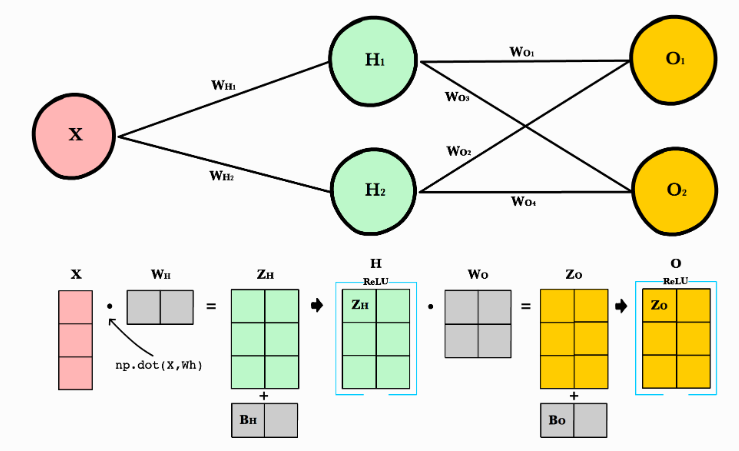

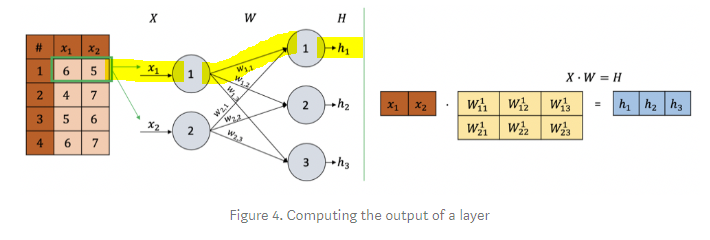

## Matrix 미분 정리
$H = XW+b　　　(n,h) = (n,d)x(d,h)+(h,)$  
$L = f(H)$  

$\frac{\partial L}{\partial W} = \frac{\partial H}{\partial W} \times \frac{\partial L}{\partial H} = X^{T}\frac{\partial L}{\partial H}$

$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial H} \times \frac{\partial H}{\partial X} = \frac{\partial L}{\partial H}W^{T}$

$\frac{\partial L}{\partial b} = 1*\frac{\partial L}{\partial H}$  

## 2Layers Chain Rule 정리
**Forward** 

$H = XW_{1} + b$  
$A = ReLU(H)$  
$S = AW_{2} + b_{2}$  
$P = Softmax(S)$  
$L = -LogLikelihood(P)$


**Backward**

$\frac{\partial L}{\partial S} = P-T$　:　T는 Label  

$\frac{\partial L}{\partial W_{2}} = \frac{\partial S}{\partial W_{2}}\frac{\partial L}{\partial S} = A^{T}\frac{\partial L}{\partial S}$ 　

$\frac{\partial L}{\partial b_{2}} = 1*\frac{\partial L}{\partial S} = P-T$  

$\frac{\partial L}{\partial A} = \frac{\partial L}{\partial S}\frac{\partial S}{\partial A} = \frac{\partial L}{\partial S}W_{2}^{T}$　

$\frac{\partial L}{\partial H} = \frac{\partial A}{\partial H}\frac{\partial L}{\partial A}$  

$\frac{\partial L}{\partial W_{1}} = \frac{\partial H}{\partial W_{1}}\frac{\partial L}{\partial H} = X^{T}\frac{\partial L}{\partial H}$  

$\frac{\partial L}{\partial b_{1}} = \frac{\partial L}{\partial H}$  

# Assignment 2

같이 드린 파일중 model.py라는 파일이 있을거에요!!!  
그 친구의 빈칸을 채워주시면 되겠습니다~!!  
model.py의 함수는 assignment3의 모델 만들기에서 사용되니 참고하시면서 채워주시면 도움이 될거에요!

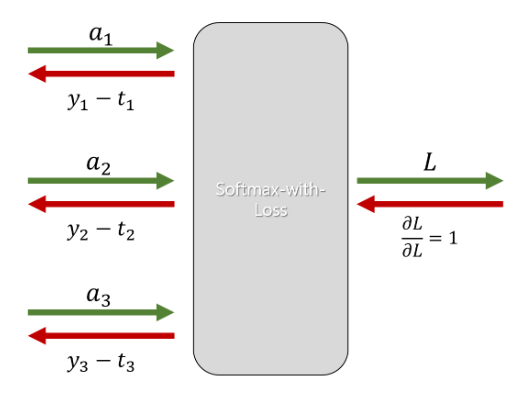

- 다범주 분류 문제를 풀기 위한 딥러닝 모델 말단에 softmax 함수를 사용한다.
- *softmax* 함수는 범주 수 만큼의 차원을 갖는 입력 벡터를 받아서 확률(요소의 합=1)로 변환해준다.
- **loss function** 으로는 **cross entropy** 가 사용되는데, cross entropy는 softmax 확률 분포와 정답 분포와의 차이를 나타낸다.
- 이를 기본으로 해서 오차를 최소화 하는 방향으로 파라미터를 업데이트 해야한다.

- 음의 로그우도로 딥러닝 모델의 손실을 정의하면 이는 곧 두 확률분포 사이의 차이를 재는 함수인 크로스 엔트로피가 되며, **크로스 엔트로피는 비교 대상 확률분포의 종류를 특정하지 않기 때문입니다.**

- output node의 출력 분포와 우리가 가진 데이터의 분포 사이의 차이가 곧 크로스 엔트로피가 됩니다. 

- 이 차이만큼을 loss로 보고 이 loss에 대한 그래디언트를 구해 이를 역전파하는 과정이 딥러닝의 학습이 되겠습니다.

- 뿐만 아니라 **정답이 아닌 노드의 손실에 대한 그래디언트는 소프트맥스 확률값이고, 정답 레이블에 해당하는 노드의 그래디언트는 여기에서 1을 빼준 값** 이 된다. (예컨대 정답이 t3이라면 역전파되는 그래디언트는 각각 y1,y2,y3−1)

https://ratsgo.github.io/deep%20learning/2017/09/24/loss/

softmax 함수 수식
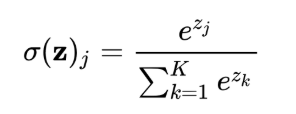

cross entropy 

https://deepnotes.io/softmax-crossentropy

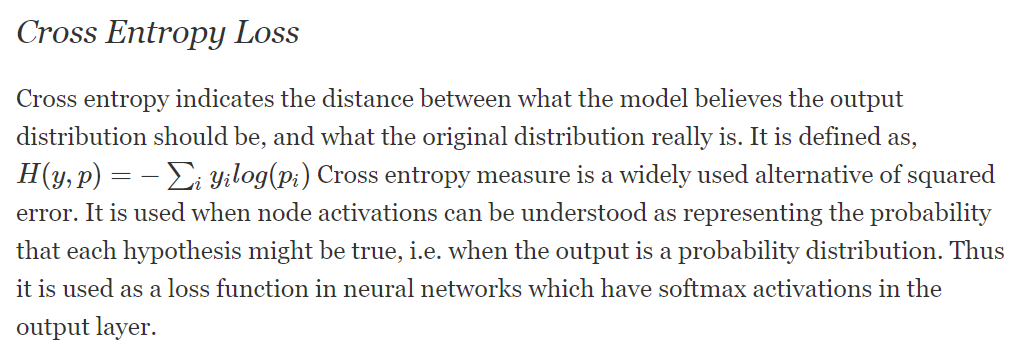

In [1]:
import numpy as np
import math

class TwoLayerNet():
    """
    2 Layer Network를 만드려고 합니다.

    해당 네트워크는 아래의 구조를 따릅니다.

    input - Linear - ReLU - Linear - Softmax

    Softmax 결과는 입력 N개의 데이터에 대해 개별 클래스에 대한 확률입니다.
    """

    def __init__(self, X, input_size, hidden_size, output_size, std=1e-4):
        """
         네트워크에 필요한 가중치들을 initialization합니다.
         initialized by random values
         해당 가중치들은 self.params 라는 Dictionary에 담아둡니다.

         input_size: 데이터의 변수 개수 - D
         hidden_size: 히든 층의 H 개수 - H
         output_size: 클래스 개수 - C

        """
        self.params = {}
        self.params["W1"] = std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.random.randn(hidden_size)
        self.params["W2"] = std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.random.randn(output_size)

    def forward(self, X, y=None):

        """

        X: input 데이터 (N, D)
        y: 레이블 (N,)   // 0 <= y[i] < C

        Linear - ReLU - Linear - Softmax - CrossEntropy Loss

        y가 주어지지 않으면 
        
        Softmax 결과 p와 
        Activation 결과 a를 return합니다.
        
        p와 a 모두 backward에서 미분할때 사용합니다.
        y가 주어지면 CrossEntropy Error를 return합니다.

        """

        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        N, D = X.shape

        # 여기에 p를 구하는 작업을 수행하세요.

        h = np.dot(X, W1) + b1   # 1 layer
        a = np.maximum(0, h)    # activation relu  : 입력된 값과 0을 비교해서 더 큰값 반환 
        o = np.dot(a, W2) + b2  # 2 layer
        p = np.exp(o)/np.sum(np.exp(o),axis=1).reshape(-1,1)   # softmax 확률계산 p =(N,C)

        if y is None:
            return p, a
        
        # 여기에 Loss를 구하는 작업을 수행하세요.
        # forward 는 우리가 예측을 하는 부분이다. = 여기서 loss를 구한다는것은 
        # 예측한 값과 실제값이 얼마나 차이를 보이는지 알기 위해서 이다.
        
        # https://deepnotes.io/softmax-crossentropy 
        # H(y,p)=−∑iyilog(pi)
        
        # N개의 자료에 대한 오차의 합계
        log_likelihood = 0
        log_likelihood -= np.log(p[np.arange(N), y]).sum()
        Loss = log_likelihood / N
        
        print('loss : ',Loss)

        return Loss



    def backward(self, X, y, learning_rate=1e-5):
        """

        X: input 데이터 (N, D)
        y: 레이블 (N,)

        grads에는 Loss에 대한 W1, b1, W2, b2 미분 값이 기록됩니다.

        원래 backward 미분 결과를 return 하지만
        여기서는 Gradient Descent방식으로 가중치 갱신까지 합니다.

        """
        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        N = X.shape[0] # 데이터 개수
        grads = {}

        
        # p = softmax 확률 결과값
        # a = activation 한 값
        p, a = self.forward(X)

        # 여기에 파라미터에 대한 미분을 저장하세요.
        
        # p의 미분값을 구하기 위한 dp
        dp = p
        for i in range(p.shape[0]):  # 행  N
            for j in range(p.shape[1]):  # 열 C
                if(j==y[i]):   
                    dp[i][j]-=1  # 정답 레이블에 해당하는 노드의 그래디언트는 확률값에서 1을 빼준 값        
          # dL/dS = p-y
        
        # dL/dA = dL/dS * W.T
        da = np.dot(dp, W2.T)
    
        # relu 미분함수 = dA/dH
        dr = np.heaviside(a,0)
        
        # dL/dH = dA/dH * dL/dA
        # hadamard product ...???
        dh = dr*da

        # 
        grads["W2"] = np.dot(a.T,dp)
        grads["b2"] = np.sum(dp,axis=0)
        grads["W1"] = np.dot(X.T, dh )
        grads["b1"] = np.sum(dh, axis=0)
        
        #가중치 갱신 
        self.params["W2"] -= learning_rate * grads["W2"]
        self.params["b2"] -= learning_rate * grads["b2"]
        self.params["W1"] -= learning_rate * grads["W1"]
        self.params["b1"] -= learning_rate * grads["b1"]

    def accuracy(self, X, y):

        p, _ = self.forward(X)
        
        
        pre_p = np.argmax(p,axis=1)

        return np.sum(pre_p==y)/pre_p.shape[0]


In [2]:
# 흠,,, 뭐가 잘못된거지,, 

import numpy as np
import math

class ThreeLayerNet():


    def __init__(self, X, input_size, hidden_size1,hidden_size2, output_size, std=1e-4):

        self.params = {}
        self.params["W1"] = std * np.random.randn(input_size, hidden_size1)
        self.params["b1"] = np.random.randn(hidden_size1)
        self.params["W2"] = std * np.random.randn(hidden_size1, hidden_size2)
        self.params["b2"] = np.random.randn(hidden_size2)
        self.params["W3"] = std * np.random.randn(hidden_size2, output_size)
        self.params["b3"] = np.random.randn(output_size)        

    def forward(self, X, y=None):

        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        W3, b3 = self.params["W3"], self.params["b3"]
        N, D = X.shape

        # 여기에 p를 구하는 작업을 수행하세요.

        h1 = np.dot(X, W1) + b1   # 1 layer
        a1 = np.maximum(0, h1)    # activation relu  : 입력된 값과 0을 비교해서 더 큰값 반환 
        h2 = np.dot(a1, W2) + b2  # 2 layer
        a2 = np.maximum(0, h2)    # activation relu  : 입력된 값과 0을 비교해서 더 큰값 반환    
        o = np.dot(a2, W3) + b3  # 3 layer
        
        p = np.exp(o)/np.sum(np.exp(o),axis=1).reshape(-1,1)   # softmax 확률계산 p =(N,C)

        if y is None:
            return p, a1,a2
        
        # 여기에 Loss를 구하는 작업을 수행하세요.
        # Error = -log(정답 label의 Softmax probability)의 총 합계
        # log내에 들어가는 확률값이 1에 가까울수록 -log변환의 값은 작다.
          
        # https://deepnotes.io/softmax-crossentropy 
        # H(y,p)=−∑iyilog(pi)
        
        # N개의 자료에 대한 오차의 합계
        log_likelihood = 0
        log_likelihood -= np.log(p[np.arange(N), y]).sum()
        Loss = log_likelihood / N
        
        print('loss : ',Loss)

        return Loss



    def backward(self, X, y, learning_rate=1e-5):

        W1, b1 = self.params["W1"], self.params["b1"]
        W2, b2 = self.params["W2"], self.params["b2"]
        W3, b3 = self.params["W3"], self.params["b3"]
        N = X.shape[0] # 데이터 개수
        grads = {}

        
        # p = softmax 확률 결과값
        # a = activation 한 값
        p, a1,a2 = self.forward(X)

        # 여기에 파라미터에 대한 미분을 저장하세요.
        
        # p의 미분값을 구하기 위한 dp
        dp = p
        for i in range(p.shape[0]):  # 행  N
            for j in range(p.shape[1]):  # 열 C
                if(j==y[i]):   
                    dp[i][j]-=1  # 정답 레이블에 해당하는 노드의 그래디언트는 확률값에서 1을 빼준 값        
          # p-y
        
        # relu 미분함수
        dr2 = np.heaviside(a2,0)
        
        da2 = np.dot(dp, W3.T)
        
        dh2 = dr2* da2
        
        dr1 = np.heaviside(a1,0)
        
        da1 = np.dot(dh2, W2.T)
        
        dh1 = dr1* da1
        

        # 
        grads["W3"] = np.dot(a2.T,dp)
        grads["b3"] = np.sum(dp,axis=0)
        grads["W2"] = np.dot(a1.T,dh2)
        grads["b2"] = np.sum(dh2,axis=0)
        grads["W1"] = np.dot(X.T, dh1 )
        grads["b1"] = np.sum(dh1, axis=0)
        
        #가중치 갱신 
        self.params["W3"] -= learning_rate * grads["W3"]
        self.params["b3"] -= learning_rate * grads["b3"]
        self.params["W2"] -= learning_rate * grads["W2"]
        self.params["b2"] -= learning_rate * grads["b2"]
        self.params["W1"] -= learning_rate * grads["W1"]
        self.params["b1"] -= learning_rate * grads["b1"]

    def accuracy(self, X, y):

        p, a1,a2 = self.forward(X)
        
        
        pre_p = np.argmax(p,axis=1)

        return np.sum(pre_p==y)/pre_p.shape[0]


# Assignment 3

자 이제 저희가 구현한 모델을 가지고 한번 cifar-10 dataset을 학습해볼게요!!  
근데 시작하기에 앞서 pip install keras 를 해주세요!!  

3번과제의 목적은 하이퍼파라미터를 튜닝하던 다른방법을 사용하던 해서 마지막에 그림그리기에서 높은 validation accuracy가 나오도록 하는 과제입니다!!  

모델을 2층이아니라 본인만의 3층으로 발전시켜도 좋구요 다른 여러가지 방법들이 있겠죠!?!?!?  

가장 높은 validation accuracy를 뽑으신 분께 상품을 드리겠습니다아~!!!

**도전**
1. 첫번째 시도 
 : layer를 3층으로 바꿔보자!
 : 실패...?ㅋㅋㅋㅋㅋㅋㅋㅋ 뭐가 잘못된건지는 잘 모르겠지만 accuracy가 0.1 언저리에서 오르지 않는다.

2. epoch 를 늘리고 learning rate 를 0.001 로 했더니 그닥 좋은 성능 X  0.37 0.39 이정도.. 
3. epoch 만 늘려보자 > 그나마 0.4 정도에서 수렴
4. batch_size 를 키워보자

### 데이터 load

keras 프레임워크를 이용하여 데이터를 로드해 옵니다.  
32*32*3차원의 데이터를 3072차원으로 바꾸는 것 까지 해드릴게요.
필요하면 sklearn.preprocessing의 scaler를 사용해보셔도 좋습니다!

In [3]:
!pip install keras

In [4]:
from keras.datasets import cifar10
import numpy as np
from Model import TwoLayerNet
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
def preprocessing_data(x_train, x_test, y_train, y_test):
    #change dtype
    x_train = np.array(x_train, dtype=np.float64)
    x_test = np.array(x_test, dtype=np.float64)
    
    #reshaping
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    x_test = np.reshape(x_test, (x_test.shape[0], -1))
    
    y_train = np.reshape(y_train, (y_train.shape[0],))
    y_test = np.reshape(y_test, (y_test.shape[0],))
        
    #normalizing
    mean_value = np.mean(x_train, axis=0)
    x_train -= mean_value
    x_test -= mean_value
    
    return x_train, x_test, y_train, y_test

In [7]:
x_train, x_test, y_train, y_test = preprocessing_data(x_train, x_test, y_train, y_test)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 3072)
(10000, 3072)
(50000,)
(10000,)


데이터가 너무 많아서 5000개랑 1000개만 사용해보도록 할게요

In [9]:
x_train = x_train[:5000]
y_train = y_train[:5000]
x_test = x_test[:1000]
y_test = y_test[:1000]

### 데이터 확인

실제 데이터가 어떻게 생겼는지 한번 봅시다

In [10]:
x_train

array([[ -71.71074,  -74.05614,  -69.5538 , ...,   -3.63908,  -33.8503 ,
         -42.38186],
       [  23.28926,   40.94386,   54.4462 , ...,   16.36092,    7.1497 ,
          29.61814],
       [ 124.28926,  118.94386,  122.4462 , ...,  -46.63908,  -39.8503 ,
         -30.38186],
       ...,
       [  36.28926,   26.94386,   12.4462 , ...,  -84.63908,  -47.8503 ,
         -30.38186],
       [  23.28926,   15.94386,   -7.5538 , ...,   67.36092,  121.1497 ,
          -0.38186],
       [ -85.71074, -104.05614, -111.5538 , ...,   29.36092,   16.1497 ,
         -14.38186]])

### 하이퍼파라미터 설정

이제 하이퍼파라미터를 설정해볼게요.  
hidden_size, epoch_size, batch_size, learning_rate등은 전부 하이퍼 파라미터이니 바꾸면서 도전해보세요!!

In [11]:
input_size = 32 * 32 * 3  # 이미지 데이터의 크기는 3x32x32
hidden_size = 50
output_size = 10    # 10 개로 분류를 해낼거다. 
epoch_size = 1500   # 1 epoch : 전체 데이터에 대해 1회 학습
batch_size = 1000  # 1회 update할 때 쓰일 자료의 크기
learning_rate = 0.0001  
N = x_train.shape[0]

### 모델 만들기

input_size, hidden_size, output_size는 데이터에 맞게 잘 설정해주세요.

In [12]:
batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
x_batch = x_train[batch_mask]

In [13]:
nn = TwoLayerNet(x_batch, input_size=input_size, hidden_size=hidden_size, output_size=output_size)

In [14]:
history = {'val_acc': [],'val_loss': []} #기록해서 그림 그리자!

#코드를 보며 epoch, batch에 대해서 이해해봅시다.
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size) #이번 배치에서 쓸 데이터들 인덱스 추출
        x_batch = x_train[batch_mask]
        t_batch = y_train[batch_mask]
        
        nn.backward(x_batch, t_batch, 1e-7) # 가중치 갱신
    
    #accuracy와 loss를 기록해둡시다.
    history["val_acc"].append(nn.accuracy(x_test, y_test))
    history["val_loss"].append(nn.forward(x_test, y_test))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(x_test, y_test))
        print(i, "test loss     :", nn.forward(x_test, y_test))

loss :  2.678381866041829
0 test accuracy : 0.112
loss :  2.678381866041829
0 test loss     : 2.678381866041829
loss :  2.6770030182602977
loss :  2.6755543299075706
loss :  2.6740047146240684
loss :  2.6723285818267866
loss :  2.6703977298863895
loss :  2.6680315545583855
loss :  2.6652694403780353
loss :  2.661736086487168
loss :  2.6572575473737463
loss :  2.6512573894044555
10 test accuracy : 0.112
loss :  2.6512573894044555
10 test loss     : 2.6512573894044555
loss :  2.6435548380649747
loss :  2.633368923117604
loss :  2.6212437329378355
loss :  2.6053053983056715
loss :  2.5865289053578575
loss :  2.564253776981349
loss :  2.5371257463764185
loss :  2.5084196937272663
loss :  2.47718747001697
loss :  2.4478541835315792
20 test accuracy : 0.15
loss :  2.4478541835315792
20 test loss     : 2.4478541835315792
loss :  2.4217203841151633
loss :  2.397320140111239
loss :  2.3767588015993617
loss :  2.3591985795243984
loss :  2.3452575866550123
loss :  2.3335937963144207
loss :  2.323

loss :  1.8282394335570418
230 test accuracy : 0.335
loss :  1.8282394335570418
230 test loss     : 1.8282394335570418
loss :  1.827561508096339
loss :  1.8269614815907782
loss :  1.8256454624054004
loss :  1.8247678358946524
loss :  1.8246665526786179
loss :  1.823284352311015
loss :  1.8222684353593757
loss :  1.8217438852754695
loss :  1.8210567134719362
loss :  1.8202811744200098
240 test accuracy : 0.345
loss :  1.8202811744200098
240 test loss     : 1.8202811744200098
loss :  1.8194863123053095
loss :  1.818162985578491
loss :  1.8179738343506429
loss :  1.8175528551500915
loss :  1.8170364743637792
loss :  1.8158773565486617
loss :  1.8153586744486483
loss :  1.8140981976912909
loss :  1.8128986983880218
loss :  1.811898567032254
250 test accuracy : 0.347
loss :  1.811898567032254
250 test loss     : 1.811898567032254
loss :  1.8112921435739884
loss :  1.8110126607779233
loss :  1.8098477201308074
loss :  1.8086245307426727
loss :  1.8081707964733675
loss :  1.8072045930156937
l

loss :  1.7013055987635766
loss :  1.7005076499467158
loss :  1.6996335042223887
460 test accuracy : 0.39
loss :  1.6996335042223887
460 test loss     : 1.6996335042223887
loss :  1.6988885906946007
loss :  1.6991814317256075
loss :  1.6989888406580163
loss :  1.6989320856654995
loss :  1.698385228651989
loss :  1.698751380543446
loss :  1.698019976876914
loss :  1.6979253918230033
loss :  1.6974420907834598
loss :  1.6969348606134382
470 test accuracy : 0.39
loss :  1.6969348606134382
470 test loss     : 1.6969348606134382
loss :  1.69695788224028
loss :  1.6972138343360972
loss :  1.697167348752144
loss :  1.6967378494819239
loss :  1.6957750277362833
loss :  1.695828801068705
loss :  1.6955051571864455
loss :  1.6944909986744063
loss :  1.6937902291559304
loss :  1.6936941959212954
480 test accuracy : 0.393
loss :  1.6936941959212954
480 test loss     : 1.6936941959212954
loss :  1.6937434794389568
loss :  1.693280359677976
loss :  1.6929594490962065
loss :  1.692883685606545
loss :

loss :  1.654377960536261
loss :  1.6545286698979391
loss :  1.6543709732475855
loss :  1.6535686896488855
loss :  1.6548290000802512
690 test accuracy : 0.41
loss :  1.6548290000802512
690 test loss     : 1.6548290000802512
loss :  1.6550048543300726
loss :  1.6535503339824955
loss :  1.6528741789050032
loss :  1.653582307807675
loss :  1.6531096290439855
loss :  1.6536489384894348
loss :  1.653653365998045
loss :  1.6529155647725027
loss :  1.6525210686695435
loss :  1.6529023978689794
700 test accuracy : 0.406
loss :  1.6529023978689794
700 test loss     : 1.6529023978689794
loss :  1.6521944031857454
loss :  1.6523666686312763
loss :  1.6529976373377422
loss :  1.6530573189558877
loss :  1.6529542173341247
loss :  1.6535723868378123
loss :  1.6538697095629378
loss :  1.6537678110772198
loss :  1.6541923981180044
loss :  1.6537754882539717
710 test accuracy : 0.402
loss :  1.6537754882539717
710 test loss     : 1.6537754882539717
loss :  1.6538433050916692
loss :  1.6533232639703659

loss :  1.6595647794363477
loss :  1.658204742638844
loss :  1.6576941645831675
loss :  1.659833568716308
loss :  1.6604069158374495
loss :  1.6595840739667278
loss :  1.6588630087989473
920 test accuracy : 0.414
loss :  1.6588630087989473
920 test loss     : 1.6588630087989473
loss :  1.6575823308388122
loss :  1.6582436780531198
loss :  1.6578402677518753
loss :  1.6570749136369045
loss :  1.6567589490254748
loss :  1.6591212947785536
loss :  1.6597734706618983
loss :  1.6593096285311562
loss :  1.6599197472632095
loss :  1.6597715001631481
930 test accuracy : 0.414
loss :  1.6597715001631481
930 test loss     : 1.6597715001631481
loss :  1.6612428438760716
loss :  1.6597933382019159
loss :  1.6609765320178238
loss :  1.6604625909017576
loss :  1.6607623685858897
loss :  1.6612799096676767
loss :  1.6611169371405452
loss :  1.660422271996631
loss :  1.6611802375426832
loss :  1.6625222295426711
940 test accuracy : 0.417
loss :  1.6625222295426711
940 test loss     : 1.662522229542671

loss :  1.6974132286289632
loss :  1.698374277884977
loss :  1.6972770194785693
loss :  1.6985616466706621
loss :  1.7000479327194922
loss :  1.6984998640788307
loss :  1.6976595499876592
loss :  1.700434901459873
loss :  1.6991128093569723
loss :  1.7011722272769827
1150 test accuracy : 0.412
loss :  1.7011722272769827
1150 test loss     : 1.7011722272769827
loss :  1.7015339564549636
loss :  1.7023978342038382
loss :  1.7025796656734056
loss :  1.701832678080265
loss :  1.7018755001675254
loss :  1.6999876224491763
loss :  1.701687622936929
loss :  1.7017416475880638
loss :  1.7015575082013807
loss :  1.7024075341140494
1160 test accuracy : 0.41
loss :  1.7024075341140494
1160 test loss     : 1.7024075341140494
loss :  1.70233048654435
loss :  1.7038269981082044
loss :  1.7036836670754678
loss :  1.7043090040919118
loss :  1.7040936090645542
loss :  1.7022808014518171
loss :  1.7034153694137508
loss :  1.7043276160223317
loss :  1.704390626407289
loss :  1.704728562905669
1170 test a

loss :  1.7557428834166675
loss :  1.7578862372326798
loss :  1.7559196124706147
loss :  1.7585438118545589
loss :  1.7604079131488575
loss :  1.7583027490135896
loss :  1.757184817779239
loss :  1.757377958668715
loss :  1.7592768273125727
loss :  1.7580862379380773
1380 test accuracy : 0.407
loss :  1.7580862379380773
1380 test loss     : 1.7580862379380773
loss :  1.7573811120798286
loss :  1.7613536225310635
loss :  1.763800218603936
loss :  1.7642872362211162
loss :  1.761571018096296
loss :  1.7626359800287437
loss :  1.7632352321925173
loss :  1.7643420224748916
loss :  1.7645663497526511
loss :  1.763543093288409
1390 test accuracy : 0.403
loss :  1.763543093288409
1390 test loss     : 1.763543093288409
loss :  1.764444435440965
loss :  1.765436946438403
loss :  1.7651623818739195
loss :  1.7637314225851861
loss :  1.7638026132857116
loss :  1.7656128542478144
loss :  1.766133287666738
loss :  1.7673192234798847
loss :  1.7673299785182595
loss :  1.768987779119885
1400 test acc

### 그림 그리기

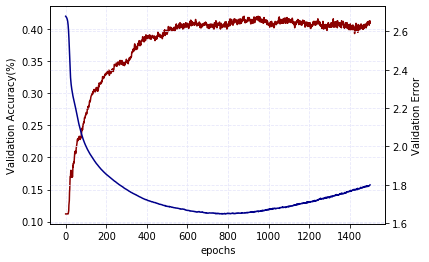

나의 최고 validation loss :  0.42


In [15]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

# 나의 최고 validation accuracy는? 두구두구~
print("나의 최고 validation loss : ",max(history['val_acc']))